In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 
from collections import Counter


In [7]:
def formata_sequencia(seq1, seq2): 
    sequencias = []

    for sequencia in [seq1, seq2]: 
        sequencia = sequencia.upper()
        
        if sequencia[0] == ">":
            sequencia = sequencia.splitlines()
            sequencia = sequencia[1:]
            sequencia = "".join(sequencia)
            sequencia = "*" + sequencia
            sequencias.append(sequencia)
        
        else:
            sequencia = sequencia.splitlines()
            sequencia = "".join(sequencia)
            sequencia = "*" + sequencia
            sequencias.append(sequencia)
        
    return sequencias

In [17]:
def eh_dna(sequencias):
    for sequencia in sequencias:
        if set(sequencia).issubset({"A", "C", "G", "T", "*"}):
            return True
        else:
            return False

In [20]:
def conta_nucleotideos(sequencia, selecao="Quantidade"):    

    mapa = Counter(sequencia)

    adenina = mapa["A"]
    citosina = mapa["C"]
    guanina = mapa["G"]
    timina = mapa["T"]
    total = len(sequencia)

    porc_adenina = (adenina / total) * 100
    porc_citosina = (citosina / total) * 100
    porc_guanina = (guanina / total) * 100
    porc_timina = (timina / total) * 100
    porc_total = porc_adenina + porc_citosina + porc_guanina + porc_timina

    df = pd.DataFrame({"Quantidade": [adenina, citosina, guanina, timina, total],
                        "Porcentagem (%)": [porc_adenina, porc_citosina, porc_guanina, porc_timina, porc_total]},
                        index=["Adenina", "Citosina", "Guanina", "Timina", "Total"])

    fig, ax = plt.subplots(figsize=(6,3))
    ax = sns.barplot(x=df.index[:4], y=selecao, data=df.iloc[:4])
    ax.set_title(f"{selecao} de nucleotídeos", fontweight="bold", fontsize=14)
    ax.set_ylabel(f"{selecao}", fontsize=12)
    if selecao == "Porcentagem (%)":
        ax.set_ylim(0, 100)
  
    return df, fig


In [10]:
def conteudo_gc(sequencia):

    gc = sequencia.count("G") + sequencia.count("C")
    porcentagem_gc = (gc / len(sequencia)) * 100
    porcentagem_at = 100 - porcentagem_gc
     
    df = pd.DataFrame({"Porcentagem (%)": [porcentagem_gc, porcentagem_at]},
                        index=["GC", "AT"])
    
    fig, ax = plt.subplots(figsize=(6,3))
    ax = sns.barplot(x=df.index, y="Porcentagem (%)", data=df)
    ax.set_title(f"Conteúdo GC", fontweight="bold", fontsize=14)
    ax.set_ylabel("Porcentagem (%)", fontsize=12)
    ax.set_ylim(0, 100)
    
    return df, fig

In [26]:
seq1 = """>Meu_DNA
GAACACGTGGAGGCAAACAGGAAGGTGAAGAAGAACTTATCCTATCAGGACGGAAGGTGCTCGG
ATCTTCCTCGCGACTCTAAATTGCCCCCTCTGAGGTCAAGGAACACAAGATGGTTTTGGAAATG
TGAACCCATTATAACATAAACCAGCATCGTGCCTGAAGCCATGCCTGCTGCCACCATGCCAGTCC"""

seq2 = """>Meu_DNA
GAACACGTGGAGGCAAACAGGAaaaaaaaaaaaaaaaaaAGGTGAAGAAGAACTTATCCTATCAGGACGGAAGGTGCTCGG
ATCTTCCTCGCGACTCTAAATTGCCCCCGCTAGCTAGCTATCTGAGGTCAAGGAACACAAGATGGTTTTGGAAATG
TGAACCCATTATAACATAAACCAGCATCGTGCCTGAAGCCATGCCTGCTGCCACCATGCCAGTCC"""

In [27]:
sequencias_formatadas = formata_sequencia(seq1, seq2)

In [28]:
for sequencia in sequencias_formatadas:
    if eh_dna(sequencia):
        print("É dna")
    else:
        print("Não é dna")

É dna
É dna


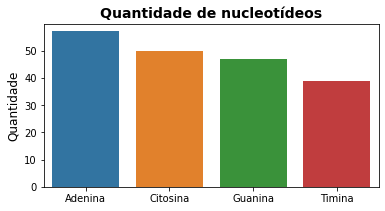

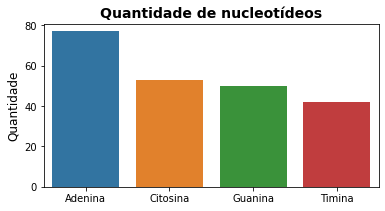

In [29]:
for sequencia in sequencias_formatadas:
    conta_nucleotideos(sequencia, "Quantidade")

(    Porcentagem (%)
 GC        50.259067
 AT        49.740933,
 <Figure size 432x216 with 1 Axes>)

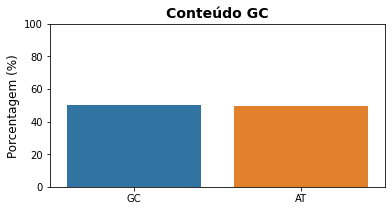

In [11]:
conteudo_gc(sequencia_formatada)

In [27]:
caminho = ("..\src\sars_cov_2.fasta")

In [33]:
default_input = open(caminho, "r").read()
default_input[:300]

'>NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome\nATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA\nCGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC\nTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTT'